In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Read each CSV into a `DataFrame`.

In [2]:
hallelujah_path = Path('data', 'good_hallelujah_trials_and_signals_q90_javier_all.csv')
into_dust_path = Path('data', 'good_into_dust_trials_and_signals_q90_javier_all.csv')
raining_blood_path = Path('data', 'good_raining_blood_trials_and_signals_q90_javier_all.csv')

hallelujah_df = pd.read_csv(hallelujah_path, index_col='_id')
into_dust_df = pd.read_csv(into_dust_path, index_col='_id')
raining_blood_df = pd.read_csv(raining_blood_path, index_col='_id')

Concatenate all song `DataFrame`s into a master `DataFrame`.

In [3]:
all_df = pd.concat([hallelujah_df, into_dust_df, raining_blood_df], axis=0, sort=False)

In [4]:
pd.set_option('display.max_columns', None)
all_df.describe()

,answers.age,answers.personality.trusting,answers.personality.artistic,answers.personality.imagination,answers.personality.reserved,answers.personality.outgoing,answers.personality.lazy,answers.personality.stress,answers.personality.nervous,answers.personality.fault,answers.personality.thorough,answers.musical_expertise,answers.concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,answers.visual_impairments,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,control_chillsshiversthrills,song_chillsshiversthrills,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,answers.musicpref.rock,answers.musicpref.traditional_irish,answers.musicpref.hip_hop,answers.musicpref.jazz,answers.musicpref.pop,answers.musicpref.hiphop,answers.musicpref.world,answers.musicpref.none,answers.musicpref.classical,answers.musicpref.folk,answers.musicpref.dance
count,663.000000,262.000000,262.000000,262.000000,262.000000,262.00000,262.000000,262.000000,262.000000,262.000000,262.000000,419.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.0,308.000000,583.000000,629.000000,583.000000,583.000000,583.000000,583.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.000000,116.000000,70.000000,70.000000,70.000000,116.000000,116.000000,70.000000,70.000000,70.000000,0.0,251.000000,0.0,0.0,0.0,0.0,46.000000,46.000000,46.000000,46.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,488.000000,663.000000,663.000000,663.000000
mean,25.915535,3.648855,2.328244,3.828244,3.068702,3.28626,3.591603,3.156489,3.538168,3.167939,3.083969,2.637232,3.927481,3.229008,3.148855,3.561069,3.179389,2.904580,3.309160,-1.0,3.418831,3.171527,3.570747,3.207547,3.310463,3.159520,2.564322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.471429,2.387931,2.185714,2.100000,1.885714,2.465517,2.612069,1.828571,2.442857,1.700000,NaN,2.043825,NaN,NaN,NaN,NaN,2.652174,2.434783,2.108696,2.717391,0.517345,0.087481,0.141780,0.184012,0.653092,0.043741,0.182504,0.010246,0.310709,0.037707,0.226244
std,13.287278,1.035194,1.256052,1.056400,1.159276,1.19310,1.189516,1.149019,1.163161,1.175436,1.083051,1.079229,1.046106,1.148478,1.363445,1.135500,1.266377,1.111787,1.093271,0.0,1.300176,1.412297,1.239029,1.414145,1.149336,1.205774,1.466310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.293478,1.283823,1.354465,1.205663,1.186187,1.435155,1.513829,1.076379,1.347415,1.012244,NaN,1.204189,NaN,NaN,NaN,NaN,1.369791,1.376827,1.079676,1.455458,0.500076,0.282752,0.349088,0.387787,0.476346,0.204672,0.386551,0.100805,0.463133,0.190631,0.418715
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,3.000000,1.000000,3.000000,2.000000,2.00000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,-1.0,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.00000

# Data Cleanup

Drop `answers.` and `metadata.` from column names.

In [5]:
def strip_prefix(prefix=''):
    def strip_fn(s):
        if s.startswith(prefix):
            return s[len(prefix):]
        return s
    return strip_fn

In [6]:
strip_answers = strip_prefix('answers.')
all_df = all_df.rename(strip_answers, axis='columns')

strip_metadata = strip_prefix('metadata.')
all_df = all_df.rename(strip_metadata, axis='columns')

In [7]:
for c in all_df.columns:
    new_c = c.replace('.', '_')
    mapper_dict = {}
    mapper_dict[c] = new_c
    all_df = all_df.rename(mapper=mapper_dict, axis='columns')

In [8]:
all_df.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,musical_expertise,concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,visual_impairments,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,control_chillsshiversthrills,song_chillsshiversthrills,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,musicpref_rock,musicpref_traditional_irish,musicpref_hip_hop,musicpref_jazz,musicpref_pop,musicpref_hiphop,musicpref_world,musicpref_none,musicpref_classical,musicpref_folk,musicpref_dance
count,663.000000,262.000000,262.000000,262.000000,262.000000,262.00000,262.000000,262.000000,262.000000,262.000000,262.000000,419.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.0,308.000000,583.000000,629.000000,583.000000,583.000000,583.000000,583.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.000000,116.000000,70.000000,70.000000,70.000000,116.000000,116.000000,70.000000,70.000000,70.000000,0.0,251.000000,0.0,0.0,0.0,0.0,46.000000,46.000000,46.000000,46.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,488.000000,663.000000,663.000000,663.000000
mean,25.915535,3.648855,2.328244,3.828244,3.068702,3.28626,3.591603,3.156489,3.538168,3.167939,3.083969,2.637232,3.927481,3.229008,3.148855,3.561069,3.179389,2.904580,3.309160,-1.0,3.418831,3.171527,3.570747,3.207547,3.310463,3.159520,2.564322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.471429,2.387931,2.185714,2.100000,1.885714,2.465517,2.612069,1.828571,2.442857,1.700000,NaN,2.043825,NaN,NaN,NaN,NaN,2.652174,2.434783,2.108696,2.717391,0.517345,0.087481,0.141780,0.184012,0.653092,0.043741,0.182504,0.010246,0.310709,0.037707,0.226244
std,13.287278,1.035194,1.256052,1.056400,1.159276,1.19310,1.189516,1.149019,1.163161,1.175436,1.083051,1.079229,1.046106,1.148478,1.363445,1.135500,1.266377,1.111787,1.093271,0.0,1.300176,1.412297,1.239029,1.414145,1.149336,1.205774,1.466310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.293478,1.283823,1.354465,1.205663,1.186187,1.435155,1.513829,1.076379,1.347415,1.012244,NaN,1.204189,NaN,NaN,NaN,NaN,1.369791,1.376827,1.079676,1.455458,0.500076,0.282752,0.349088,0.387787,0.476346,0.204672,0.386551,0.100805,0.463133,0.190631,0.418715
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,3.000000,1.000000,3.000000,2.000000,2.00000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,-1.0,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

## `answers.musical_expertise`

Replace missing values with column median.

In [9]:
np.any(all_df.musical_expertise.isna())

True

In [10]:
all_df.musical_expertise.fillna(0, inplace=True)

In [11]:
def column_hist(col):
    bins = np.arange(col.min() - 0.5, col.max() + 1.5, 1)
    plt.hist(col, bins=bins)
    plt.title('Histogram for ' + col.name);

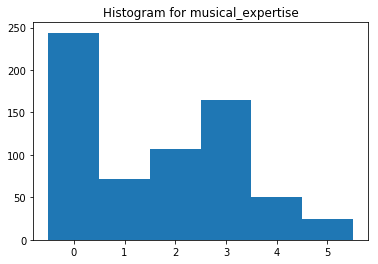

In [12]:
column_hist(all_df.musical_expertise)

In [13]:
all_df.musical_expertise.value_counts()

0.0    244
3.0    165
2.0    107
1.0     72
4.0     51
5.0     24
Name: musical_expertise, dtype: int64

In [14]:
np.any(all_df.musical_expertise.isna())

False

In [15]:
all_df.loc[:, 'musical_expertise'] = all_df.loc[:, 'musical_expertise'].astype('int').astype('category')

## `age`

Check for missing values.

In [16]:
np.any(all_df.age.isna())

False

In [17]:
q25, q75 = all_df.age.quantile(q=.25), all_df.age.quantile(q=.75)
q25, q75

(17.0, 31.0)

In [18]:
iqr = q75 - q25
iqr

14.0

In [19]:
low_cut, high_cut = q25 - (2 * iqr), q75 + (2 * iqr)
low_cut, high_cut

(-11.0, 59.0)

In [20]:
age_outliers = all_df.age[(all_df.age < 6) | (all_df.age > 100)]
age_outliers

_id
570eb72b83a73509d0e01f7c    5.0
570eb73683a73509d0e02363    5.0
570eb76d83a73509d0e0359e    1.0
Name: age, dtype: float64

In [21]:
age_outlier_idx = age_outliers.index
age_outlier_idx

Index(['570eb72b83a73509d0e01f7c', '570eb73683a73509d0e02363',
       '570eb76d83a73509d0e0359e'],
      dtype='object', name='_id')

In [22]:
all_df = all_df.drop(index=age_outlier_idx)
age_outliers = all_df.age[(all_df.age < 6) | (all_df.age > 100)]
age_outliers

Series([], Name: age, dtype: float64)

## `control_chillsshiversthrills`

In [23]:
np.any(all_df.control_chillsshiversthrills.isna())

True

In [24]:
all_df.control_chillsshiversthrills.value_counts()

Series([], Name: control_chillsshiversthrills, dtype: int64)

Drop column, as there are no valid values.

In [25]:
all_df = all_df.drop(columns='control_chillsshiversthrills')

In [26]:
all_df.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,visual_impairments,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,song_chillsshiversthrills,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,musicpref_rock,musicpref_traditional_irish,musicpref_hip_hop,musicpref_jazz,musicpref_pop,musicpref_hiphop,musicpref_world,musicpref_none,musicpref_classical,musicpref_folk,musicpref_dance
count,660.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.0,305.000000,580.000000,626.000000,580.000000,580.000000,580.000000,580.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.000000,116.000000,70.000000,70.000000,70.000000,116.000000,116.000000,70.000000,70.000000,70.000000,251.000000,0.0,0.0,0.0,0.0,46.000000,46.000000,46.000000,46.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,485.000000,660.000000,660.000000,660.000000
mean,26.016667,3.637066,2.320463,3.818533,3.054054,3.289575,3.590734,3.150579,3.536680,3.162162,3.073359,3.922780,3.216216,3.135135,3.548263,3.162162,2.899614,3.297297,-1.0,3.413115,3.162069,3.563898,3.198276,3.305172,3.150000,2.558621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.471429,2.387931,2.185714,2.100000,1.885714,2.465517,2.612069,1.828571,2.442857,1.700000,2.043825,NaN,NaN,NaN,NaN,2.652174,2.434783,2.108696,2.717391,0.519697,0.087879,0.142424,0.183333,0.653030,0.043939,0.183333,0.010309,0.310606,0.037879,0.227273
std,13.231613,1.034079,1.251978,1.057405,1.156785,1.189883,1.192057,1.149869,1.162064,1.176628,1.081211,1.046322,1.144403,1.361529,1.134632,1.262441,1.116108,1.089250,0.0,1.297705,1.409789,1.238027,1.411890,1.147938,1.201575,1.461661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.293478,1.283823,1.354465,1.205663,1.186187,1.435155,1.513829,1.076379,1.347415,1.012244,1.204189,NaN,NaN,NaN,NaN,1.369791,1.376827,1.079676,1.455458,0.499991,0.283333,0.349750,0.387233,0.476367,0.205116,0.387233,0.101114,0.463093,0.191048,0.419388
min,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.500000,2.000000,3.000000,2.000000,2.000000,3.000000,-1.0,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.0

## `control_activity`

In [27]:
np.any(all_df.control_activity.isna())

True

In [28]:
all_df.control_activity.median()

3.0

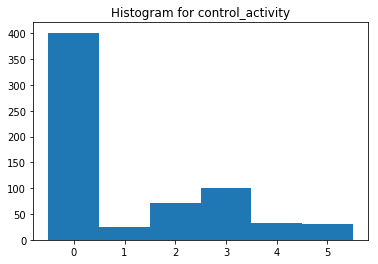

In [29]:
all_df.control_activity.fillna(0, inplace=True)
column_hist(all_df.control_activity)

In [30]:
np.any(all_df.control_activity.isna())

False

In [31]:
all_df.loc[:, 'control_activity'] = all_df.loc[:, 'control_activity'].astype('int').astype('category')

## `control_tension`

In [32]:
np.any(all_df.control_tension.isna())

True

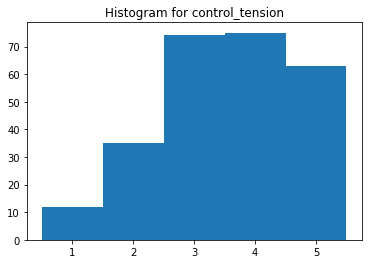

In [33]:
column_hist(all_df.control_tension)

In [34]:
all_df.control_tension.median()

4.0

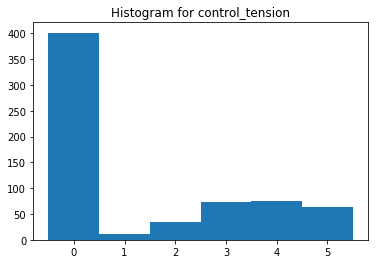

In [35]:
all_df.control_tension.fillna(0, inplace=True)
column_hist(all_df.control_tension)

In [36]:
np.any(all_df.control_tension.isna())

False

In [37]:
all_df.loc[:, 'control_tension'] = all_df.loc[:, 'control_tension'].astype('int').astype('category')

## `control_familiarity`

Drop this column, as it doesn't make any sense.

In [38]:
all_df = all_df.drop(columns='control_familiarity')
all_df.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,concentration,control_power,control_like_dislike,control_engagement,control_positivity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,visual_impairments,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,song_chillsshiversthrills,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,musicpref_rock,musicpref_traditional_irish,musicpref_hip_hop,musicpref_jazz,musicpref_pop,musicpref_hiphop,musicpref_world,musicpref_none,musicpref_classical,musicpref_folk,musicpref_dance
count,660.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,305.000000,580.000000,626.000000,580.000000,580.000000,580.000000,580.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.000000,116.000000,70.000000,70.000000,70.000000,116.000000,116.000000,70.000000,70.000000,70.000000,251.000000,0.0,0.0,0.0,0.0,46.000000,46.000000,46.000000,46.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,485.000000,660.000000,660.000000,660.000000
mean,26.016667,3.637066,2.320463,3.818533,3.054054,3.289575,3.590734,3.150579,3.536680,3.162162,3.073359,3.922780,3.216216,3.135135,3.162162,3.297297,3.413115,3.162069,3.563898,3.198276,3.305172,3.150000,2.558621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.471429,2.387931,2.185714,2.100000,1.885714,2.465517,2.612069,1.828571,2.442857,1.700000,2.043825,NaN,NaN,NaN,NaN,2.652174,2.434783,2.108696,2.717391,0.519697,0.087879,0.142424,0.183333,0.653030,0.043939,0.183333,0.010309,0.310606,0.037879,0.227273
std,13.231613,1.034079,1.251978,1.057405,1.156785,1.189883,1.192057,1.149869,1.162064,1.176628,1.081211,1.046322,1.144403,1.361529,1.262441,1.089250,1.297705,1.409789,1.238027,1.411890,1.147938,1.201575,1.461661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.293478,1.283823,1.354465,1.205663,1.186187,1.435155,1.513829,1.076379,1.347415,1.012244,1.204189,NaN,NaN,NaN,NaN,1.369791,1.376827,1.079676,1.455458,0.499991,0.283333,0.349750,0.387233,0.476367,0.205116,0.387233,0.101114,0.463093,0.191048,0.419388
min,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.500000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000

## `control_engagement`

In [39]:
np.any(all_df.control_engagement.isna())

True

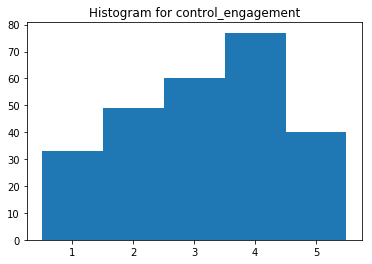

In [40]:
column_hist(all_df.control_engagement)

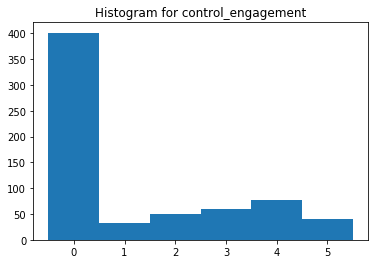

In [41]:
all_df.control_engagement.fillna(0, inplace=True)
column_hist(all_df.control_engagement)

In [42]:
all_df.loc[:, 'control_engagement'] = all_df.loc[:, 'control_engagement'].astype('int').astype('category')

## Fill other appropriate columns' NA values with 0 and 'categorify'

In [43]:
cols_to_fill_with_zero = [
    'control_positivity','control_like_dislike','song_chillsshiversthrills','song_activity','song_tension',
    'song_familiarity','song_engagement','song_positivity','song_like_dislike','song_inspired','song_wonder',
    'song_spirituality','song_thrills','song_chills','song_tenderness','song_nostalgia','song_goosebumps',
    'song_overwhelmed','song_shivers','control_power','song_transcendence','song_sadness','song_joyfulactivation',
    'song_peacefulness','song_power','personality_trusting','personality_artistic','personality_imagination',
    'personality_reserved','personality_outgoing','personality_lazy','personality_stress','personality_nervous',
    'personality_fault','personality_thorough','concentration','musicpref_traditional_irish','musicpref_jazz',
    'musicpref_folk','musicpref_hiphop','musicpref_classical','musicpref_none','musicpref_rock','musicpref_hip_hop',
    'musicpref_world','musicpref_pop','musicpref_dance','musical_background','visual_impairments',
    'hearing_impairments'
]

cols_to_drop = [
    'control_inspired','control_wonder','control_spirituality','control_thrills','control_chills',
    'control_tenderness','control_nostalgia','control_goosebumps','control_overwhelmed','control_shivers',
    'control_transcendence','control_sadness','control_joyfulactivation','control_peacefulness','dob'
]

In [44]:
for c in cols_to_fill_with_zero:
    all_df[c].fillna(0, inplace=True)
    all_df.loc[:, c] = all_df.loc[:, c].astype('int').astype('category')    

## Drop columns that don't make sense (e.g., familiarity with control stimulus)

In [45]:
for c in cols_to_drop:
    all_df = all_df.drop(columns=c)

Also drop `Unnamed: 0` column.

In [46]:
all_df = all_df.drop(columns='Unnamed: 0')

In [47]:
all_df.describe()

,age
count,660.000000
mean,26.016667
std,13.231613
min,6.000000
25%,17.000000
50%,22.000000
75%,31.000000
max,81.000000


## Fill NA values with column mode/'other' as appropriate

In [48]:
cols_to_fill_with_other = [
    'location', 'sex', 'nationality', 'language'
]

In [49]:
for c in cols_to_fill_with_other:
    all_df[c].fillna('other', inplace=True)

# Write out CSV

In [50]:
all_df.to_csv(Path('data', 'good_reaction_trials_categorified_q90_javier_all.csv'))

In [51]:
pd.read_csv(Path('data', 'good_reaction_trials_categorified_q90_javier_all.csv')).columns

Index(['_id', 'location', 'language', 'nationality', 'age', 'sex',
       'hearing_impairments', 'personality_trusting', 'personality_artistic',
       'personality_imagination', 'personality_reserved',
       'personality_outgoing', 'personality_lazy', 'personality_stress',
       'personality_nervous', 'personality_fault', 'personality_thorough',
       'musical_expertise', 'concentration', 'critical_reaction',
       'control_power', 'control_like_dislike', 'control_tension',
       'control_engagement', 'control_activity', 'control_positivity',
       'song_power', 'song_like_dislike', 'song_tension', 'song_engagement',
       'song_activity', 'song_positivity', 'song_familiarity',
       'musical_background', 'visual_impairments', 'song_inspired',
       'song_wonder', 'song_spirituality', 'song_thrills', 'song_chills',
       'song_tenderness', 'song_nostalgia', 'song_goosebumps',
       'song_overwhelmed', 'song_shivers', 'song_chillsshiversthrills',
       'song_transcendence',

# Thoughts

- Might want to look at treating Likert-type items as categorical and using a completely separate category for missing values, instead of filling them with the mean.
- Data augmentation to balance classes
- Exclude columns which are all the same for most people (chills, etc.)
- Take results from working with other songs and break out weighted F-beta scores for comparison with *Hallelujah*-only results